# Data Visualization Assignment (Matplotlib & Seaborn)
Author: Katie Sylvia

Data set in the data folder as `auto_mpg_dataset.csv`. Dataset is of cars from the 1970s and 1980s.<br>
Data from: https://www.mldata.io/datasets-sort/regression/<br>

In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
# Read in the data

mpg_data = pd.read_csv(r'data\auto_mpg_dataset.csv')

In [4]:
# Display the first 5 rows
mpg_data.head()

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,mpg
0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,18.0
1,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,15.0
2,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,18.0
3,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,16.0
4,8,302.0,140.0,3449.0,10.5,70,1,ford torino,17.0


In [5]:
# Summary statistics (using .describe())

mpg_data.describe().round(2)

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,mpg
count,398.00,398.00,398.00,398.00,398.00,398.00,398.00,398.00
mean,5.45,193.43,-1404.64,2970.42,15.57,76.01,1.57,23.51
std,1.70,104.27,12213.42,846.84,2.76,3.70,0.80,7.82
min,3.00,68.00,-100000.00,1613.00,8.00,70.00,1.00,9.00
25%,4.00,104.25,75.00,2223.75,13.82,73.00,1.00,17.50
50%,4.00,148.50,92.00,2803.50,15.50,76.00,1.00,23.00
75%,8.00,262.00,125.00,3608.00,17.18,79.00,2.00,29.00
max,8.00,455.00,230.00,5140.00,24.80,82.00,3.00,46.60


## Data Cleaning

In [6]:
# Check the datatypes
mpg_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cylinders     398 non-null    int64  
 1   displacement  398 non-null    float64
 2   horsepower    398 non-null    float64
 3   weight        398 non-null    float64
 4   acceleration  398 non-null    float64
 5   model_year    398 non-null    int64  
 6   origin        398 non-null    int64  
 7   car_name      398 non-null    object 
 8   mpg           398 non-null    float64
dtypes: float64(5), int64(3), object(1)
memory usage: 28.1+ KB


In [7]:
# Check for null values
mpg_data.isna().sum()

cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
mpg             0
dtype: int64

In [8]:
# Drop the non-numerical column
mpg_nums_only = mpg_data.drop('car_name', axis=1)

mpg_nums_only.head()

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,mpg
0,8,307.0,130.0,3504.0,12.0,70,1,18.0
1,8,350.0,165.0,3693.0,11.5,70,1,15.0
2,8,318.0,150.0,3436.0,11.0,70,1,18.0
3,8,304.0,150.0,3433.0,12.0,70,1,16.0
4,8,302.0,140.0,3449.0,10.5,70,1,17.0


## Correlations

In [9]:
# Get correlations for numeric data
mpg_corr = mpg_nums_only.corr()


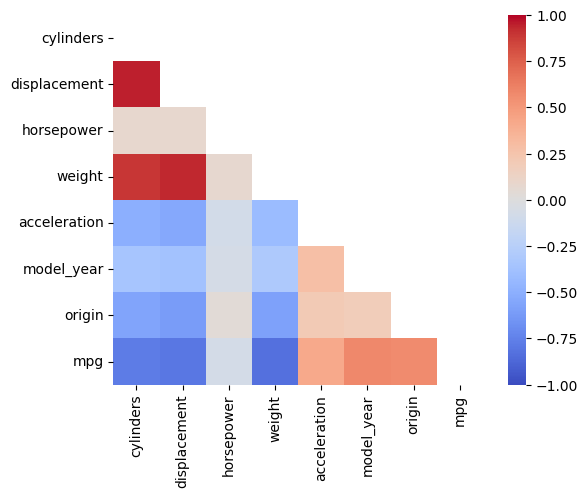

In [10]:
# Create a heatmap
mask = np.zeros_like(mpg_corr)
mask[np.triu_indices_from(mask)] = True

hm_fig = sns.heatmap(mpg_corr,
            square = True,
            cmap = 'coolwarm',
            vmin = -1,
            vmax = 1, 
            mask = mask)

hm_fig;

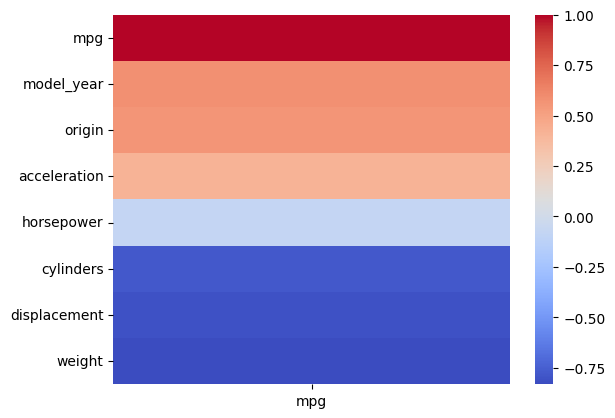

In [11]:
# What if we ONLY wanted to look at how the features correlate with `mpg`?
sns.heatmap(mpg_corr[['mpg']].sort_values('mpg', ascending=False), cmap='coolwarm');

For more Seaborn color palettes, click [here](https://seaborn.pydata.org/tutorial/color_palettes.html).

## Countplots

**Distribution of Model Year**

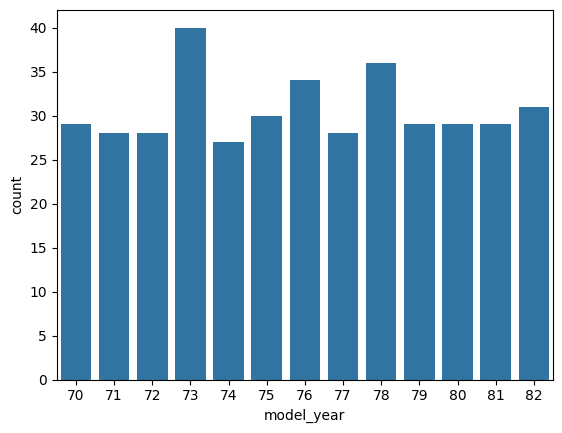

In [12]:
sns.countplot(mpg_nums_only, x= 'model_year');

**Distribution of Origin**

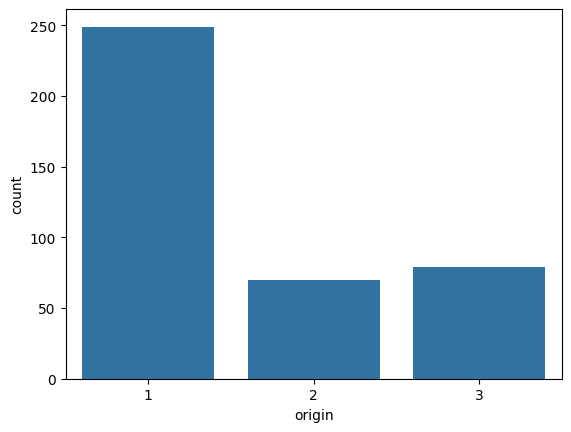

In [13]:
sns.countplot(mpg_nums_only, x= 'origin');

**Distribution of Cylinders**

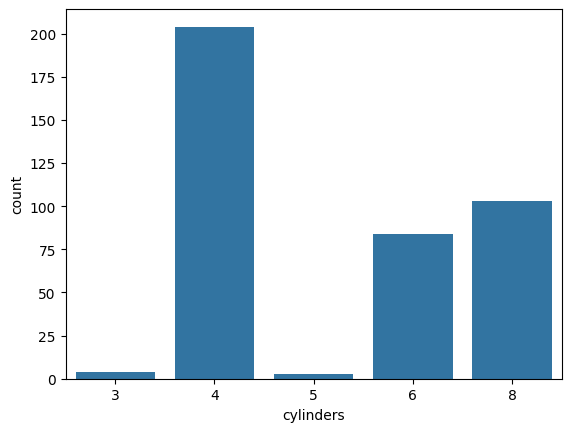

In [14]:
sns.countplot(mpg_nums_only, x = 'cylinders');

In [15]:
px.histogram(mpg_data, x='cylinders')

## Boxplots/Histograms

**MPG Distribution**

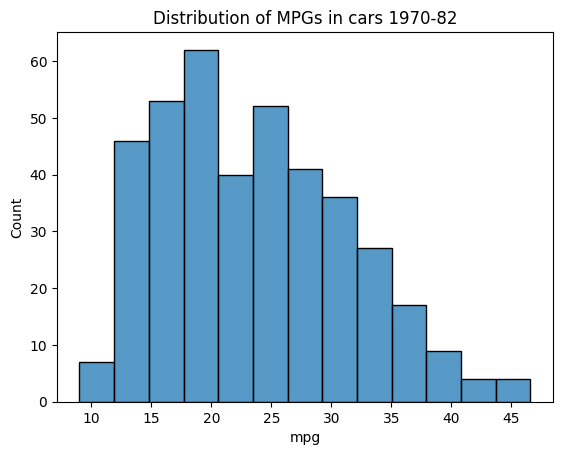

In [22]:
sns.histplot(mpg_nums_only, x='mpg', bins='auto')
plt.title('Distribution of MPGs in cars 1970-82');

**Weight Distribution**

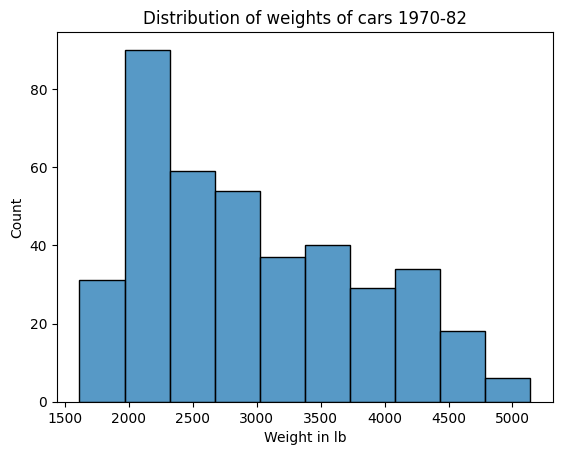

In [25]:
sns.histplot(mpg_nums_only, x='weight', bins='auto')
plt.title('Distribution of weights of cars 1970-82')
plt.xlabel('Weight in lb');

## Scatterplots

**Weight vs. MPG**

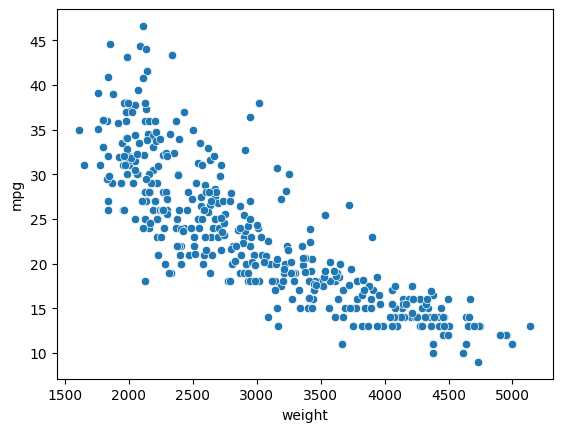

In [28]:
sns.scatterplot(mpg_nums_only, x='weight', y='mpg');

## Your turn!

In [65]:
# Create more plot(s) of your choosing to help you explore the data!

make_model = mpg_data.car_name.str.split(" ",n=1, expand=True)

make_model = make_model.join(mpg_data, how='outer')

make_model = make_model.drop(['make','car_name'], axis = 1)

make_model= make_model.rename(columns={0:'make', 1:'model'})

make_model.columns



Index(['make', 'model', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'mpg'],
      dtype='object')

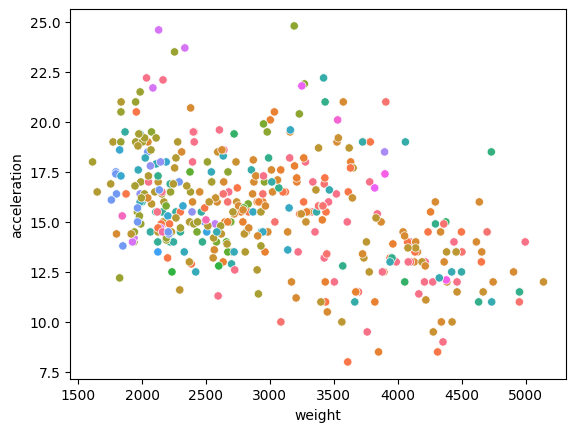

In [64]:
sns.scatterplot(x=make_model['weight'], y=make_model['acceleration'], hue=make_model['make'], legend=False);

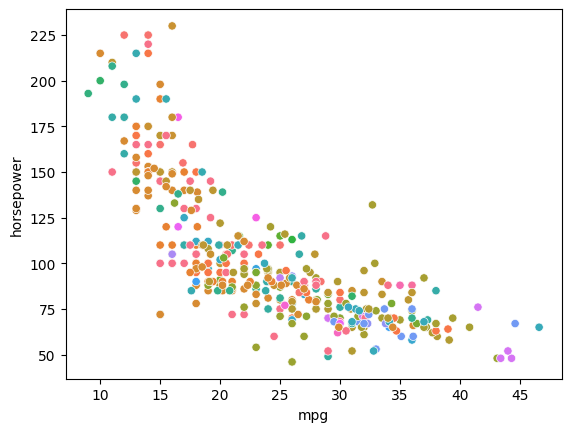

In [66]:
sns.scatterplot(make_model[make_model['horsepower'] > 0],  x='mpg', y='horsepower', hue=make_model['make'], legend=False);

In [98]:
px.line(make_model, x='model_year', y='mpg', color='make')